In [1]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sigma(z):
    return 1/(1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def sigma_deri(output):
    return output * (1 - output)

def relu_deri(z):
    return z > 0

def grad_descend(w,grad_C,n):
    w = w - n * grad_C
    return w
# cost functions
def C (output,expected):
    cost = (expected - output)**2
    return np.mean(cost)
# z function
def z(sigma,w,x,b):
    return sigma(w @ x + b)

def delta_out(output,expected):
    return 2*(expected - output)* sigma_deri(output)
 
#fazer por neuronio
# value e o valor obtido, delta_mais um e o delta de todos os neuronios da camada seguinta, w pessos em relação a camada seguite
def delta(delta_l_mais_1,w,value):
    delta_l_minos_1 = np.dot(delta_l_mais_1 , w) * relu_deri(value)
    return delta_l_minos_1

  


def delta_out_cross(output,expected,epsilon = 1e-10):
    output = np.clip(output, epsilon, 1 - epsilon)
    return  output - expected


def batch_normalization( z, gamma, beta, epsilon=1e-5):
    mean = np.mean(z, axis=0)
    variance = np.var(z, axis=0)
    z_hat = (z - mean) / np.sqrt(variance + epsilon)
    return gamma * z_hat + beta

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

In [3]:
# newral check
class newral:
    
    def __init__(self,input_size):
        # inputs 
        self.h_l_1size = 16
        self.h_l_2size = 16
        self.input_size = input_size 
        self.output_size  = 10
        
        
        # criando os vetores intermediarios
        self.y1 = np.zeros(self.h_l_1size)
        self.y2 = np.zeros(self.h_l_2size)
        self.y3 = np.zeros(self.output_size)
        
        
        #-----------------------------#
        # input vector
        self.x = np.zeros(self.input_size)

        
        # weight 0_1 # fazer a inicialização xavier
        self.w_0_1 = np.random.randn(self.h_l_1size,self.input_size)  * np.sqrt(2.0/ self.input_size)
        
        # bias 1
        self.b_1 = np.random.randn(self.h_l_1size) * np.sqrt(2.0/ self.h_l_1size)
        
        # weight 1_2 # fazer a inicialização xavier
        self.w_1_2 = np.random.rand(self.h_l_2size,self.h_l_1size) * np.sqrt(2.0/ self.h_l_1size)
        
        # bias 2
        self.b_2 = np.random.randn(self.h_l_2size) * np.sqrt(2.0/ self.h_l_2size)
        
        
        # weight 2_3
        self.w_2_3 = np.random.randn(self.output_size,self.h_l_2size) *  np.sqrt(2.0/ self.h_l_2size)
        
        # bias 3
        self.b_3 = np.random.randn(self.output_size) * np.sqrt(2.0/ self.output_size)



    def thinking(self,input_):
        
        # dou meu input
        self.x = input_
        
        # hl1
        z1 = self.w_0_1  @ self.x + self.b_1
        self.y1 = relu(z1)
        
        # hl1
        z2 = self.w_1_2  @ self.y1 + self.b_2
        self.y2 = relu(z2)
        
        #output
        z3 = self.w_2_3 @ self.y2 + self.b_3
        self.y3 = softmax(z3)
        
        return self.y3


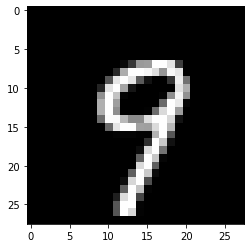

In [4]:
# Loading the images
train = np.array(pd.read_csv('archive/mnist_train.csv'))
np.random.shuffle(train) 
train_tag = train[:,0]
train = train / 255.0
 
# a linhas tem o label e a imagem
plt.imshow(train[2,1:].reshape(28, 28),cmap = 'gray')

In [5]:
train_tag[2]

9

In [6]:
# ciclo e treinameto da minha rede
# ---> iniciando minhas rede
n_inputs = 784
rede = newral(n_inputs)

In [7]:
# -------------------------- #
#size_delta_l_menos_1 = rede.h_l_size
dataset_len = 64
number_of_cicles = 60000//dataset_len
x_input = np.zeros((dataset_len,rede.input_size))


y3 = np.zeros((dataset_len,rede.output_size))
y2 = np.zeros((dataset_len,rede.h_l_2size))
y1 = np.zeros((dataset_len, rede.h_l_1size))


n = 0.1
i = 0

In [8]:
# local onde serão armazenados os deltas
deltas_L1 = np.zeros((dataset_len, rede.h_l_1size))
deltas_L2 = np.zeros((dataset_len,rede.h_l_2size))
deltas_L3 = np.zeros((dataset_len,rede.output_size))

#calculo do aprendizado
total_loss = np.zeros((number_of_cicles ,1),float)

# calculando o delta da camada anterior
size_w_1_2 = np.size(rede.w_1_2[0,:])
size_w_2_3 = np.size(rede.w_2_3[0,:])
l = 0
while l < number_of_cicles :
    expected = np.zeros((dataset_len, rede.output_size))
    # Deltas

    #Calculando os deltas de um dataset
    for i in range (dataset_len):
        # ---> guardando meu primeito output numa variavel, train é minha matriz com os valores e o label
        x_input[i,:] = train[i + l*(dataset_len - 1 ) ,1:]
        # o vetor esperado
        expected[i, train_tag[i + l*(dataset_len - 1 ) ]] = 1
        
        # minhas rede pensando
        y3[i,:] = rede.thinking(x_input[i,:])
        y2[i,:] = rede.y2
        y1[i,:] = rede.y1
        
        #calculando a função custo
        total_loss[l,:] += C(y3[i,:], expected[i,:])
    

        # calculando o delta da primeira camanda
        deltas_L3[i,:] = delta_out_cross(y3[i,:],expected[i,:])

        
        

    # calculo os meus deltas da camada 3 pra 2
    
    deltas_L2 = delta(deltas_L3,rede.w_2_3,y2)
    
        
        
    # calculo os meus deltas da camada 2 para 1
    
    deltas_L1 = delta(deltas_L2,rede.w_1_2,y1)
    


    
    

    
    # ja tenho os deltas calculados tenho que calcular agora os valores dos gradientes, de todas as imagens
    
    gradient_w_2_3_x = np.zeros((rede.output_size,rede.h_l_2size,dataset_len))
    i = 0
    k = 0
    for i in range(dataset_len):
        for k in range(rede.output_size):
            gradient_w_2_3_x[k,:,i] = deltas_L3[i,k] * y2[i,:]
        
    
    gradient_w_1_2_x = np.zeros((rede.h_l_2size,rede.h_l_1size,dataset_len))
    i = 0
    k = 0
    for i in range(dataset_len):
        for k in range(rede.h_l_2size):
            gradient_w_1_2_x[k,:,i] = deltas_L2[i,k] * y1[i,:]
        

    gradient_w_0_1_x = np.zeros((rede.h_l_1size,rede.input_size,dataset_len))
    i = 0
    k = 0
    for i in range(dataset_len):
        for k in range(rede.h_l_1size):
            gradient_w_0_1_x[k,:,i] = deltas_L1[i,k] * x_input[i,:]
        
        
              
        
        
    # calcular a media por interação agora
    gradient_w_2_3 = np.zeros((rede.output_size,rede.h_l_2size))
    gradient_w_1_2 = np.zeros((rede.h_l_2size,rede.h_l_1size))
    gradient_w_0_1 = np.zeros((rede.h_l_1size,rede.input_size))

    i = 0
    k = 0
    for i in range(rede.output_size):
        for k in range(rede.h_l_2size):
            gradient_w_2_3[i,k] = np.mean(gradient_w_2_3_x[i,k,:]) 
    
        
    
    i = 0
    k = 0
    for i in range(rede.h_l_2size):
        for k in range(rede.h_l_1size):
            gradient_w_1_2[i,k] = np.mean(gradient_w_1_2_x[i,k,:]) 
        
        
    i = 0
    k = 0
    for i in range(rede.h_l_1size):
        for k in range(rede.input_size):
            gradient_w_0_1[i,k] = np.mean(gradient_w_0_1_x[i,k,:])
        

        
    # agora a medias das bias
    grad_bias_1 = np.zeros(rede.h_l_1size)
    grad_bias_2 = np.zeros(rede.h_l_2size)
    grad_bias_3 = np.zeros(rede.output_size)

    i = 0
    for i in range(rede.h_l_1size):
        grad_bias_1[i] = np.mean(deltas_L1[:,i]) 
    k = 0
    for k in range(rede.h_l_2size):
        grad_bias_2[k] = np.mean(deltas_L2[:,k])
        
    k = 0
    for k in range(rede.output_size):
        grad_bias_3[k] = np.mean(deltas_L3[:,k])
# atualizando os gradientes(w,grad,n)
# clipando os gradientes para evitar que explodam
    max_grad = 1
    gradient_w_0_1 = np.clip(gradient_w_0_1, -max_grad, max_grad)
    gradient_w_1_2 = np.clip(gradient_w_1_2, -max_grad, max_grad)
    gradient_w_2_3 = np.clip(gradient_w_2_3, -max_grad, max_grad)

    lambda_reg = 0.001  # Fator de regularização/ gradient vanishi
    rede.w_0_1 -= n * (gradient_w_0_1 + lambda_reg * rede.w_0_1)
    rede.w_1_2 -= n * (gradient_w_1_2 + lambda_reg * rede.w_1_2)
    rede.w_2_3 -= n * (gradient_w_2_3 + lambda_reg * rede.w_2_3)

    rede.b_1 -= n*grad_bias_1
    rede.b_2 -= n*grad_bias_2
    rede.b_3 -= n*grad_bias_3
# atualizando o l
    total_loss[l,:] /= dataset_len
    l += 1
    

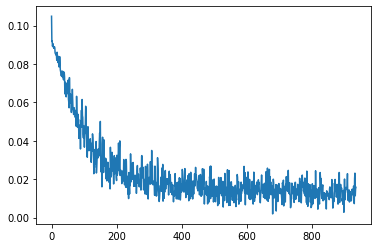

In [9]:
plt.plot(total_loss[:,:] )
#total_loss

In [11]:
print(rede.thinking(train[1000,1:]))
print(train_tag[1000])

rede.y1,rede.y2

[4.21745224e-04 1.64364173e-05 2.86187860e-05 2.67752594e-03
 2.69048443e-03 3.90982239e-04 4.19842995e-07 9.28912980e-01
 2.74453499e-03 6.21162717e-02]
7


(array([0.        , 0.32657797, 3.76227231, 0.35318222, 1.21599086,
        0.        , 1.63957226, 0.        , 1.24547184, 0.        ,
        1.55086015, 2.04830014, 0.50297698, 0.04647695, 3.70420009,
        0.        ]),
 array([2.7188921 , 4.84224358, 0.48787511, 3.99727508, 3.93280791,
        0.6773573 , 2.30394154, 1.4465985 , 0.9351521 , 2.50573463,
        1.3909458 , 2.10434173, 4.14951396, 1.84827309, 1.31661387,
        2.38863791]))